In [8]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv('ZD.csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [11]:
# let’s convert the data type of the “rate” column to float and remove the denominator.

def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate']=df['rate'].apply(handleRate)

In [12]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [14]:
# the listed_in (type) column

Text(0.5, 0, 'Type of Restaurant')

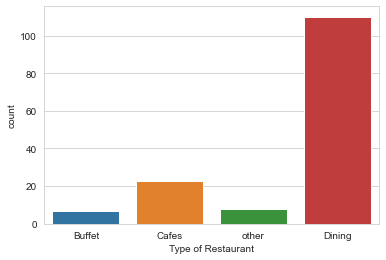

In [15]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Restaurant')

The majority of the restaurants fall into the dining category.

Text(0, 0.5, 'Votes')

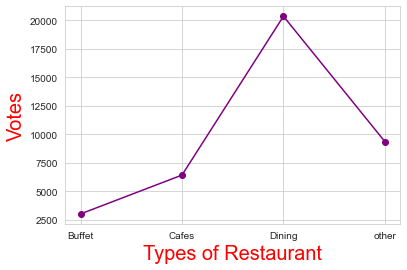

In [21]:
group_data = df.groupby('listed_in(type)')['votes'].sum()
res = pd.DataFrame({'votes': group_data})
plt.plot(res, c="purple", marker='o')
plt.xlabel("Types of Restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

Dining restaurants are preferred by a larger number of individuals.






we will determine the restaurant’s name that received the maximum votes based on a given dataframe.

In [22]:
max_votes = df['votes'].max()
maxvotes_res = df.loc[df['votes']==max_votes, 'name']
maxvotes_res

38    Empire Restaurant
Name: name, dtype: object

<AxesSubplot:xlabel='online_order', ylabel='count'>

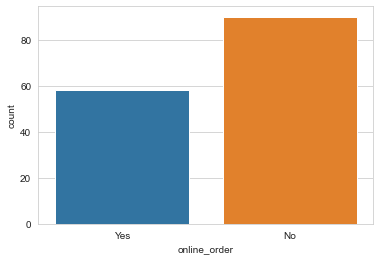

In [24]:
sns.countplot(x=df['online_order'])

This suggests that a majority of the restaurants do not accept online orders.

In [25]:
# rate column

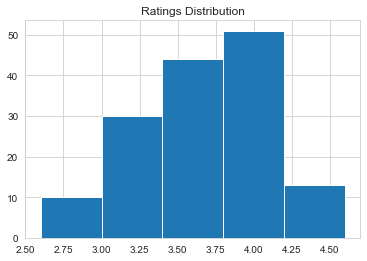

In [27]:
plt.hist(df['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

The majority of restaurants received ratings ranging from 3.5 to 4.

In [28]:
# the approx_cost(for two people) column.

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

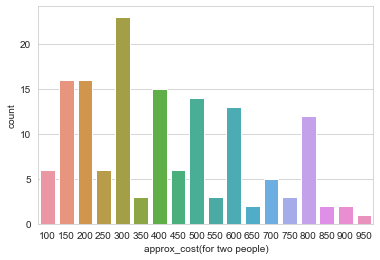

In [29]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

The majority of couples prefer restaurants with an approximate cost of 300 rupees.

In [30]:
#examine whether online orders receive higher ratings than offline orders

<AxesSubplot:xlabel='online_order', ylabel='rate'>

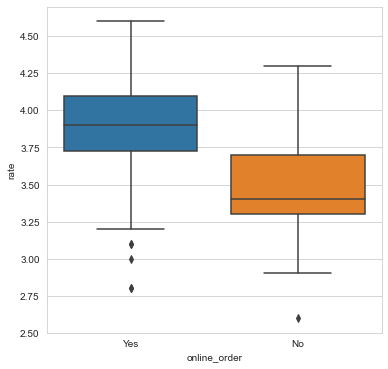

In [31]:
plt.figure(figsize = (6,6))
sns.boxplot(x="online_order", y="rate", data=df)

Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

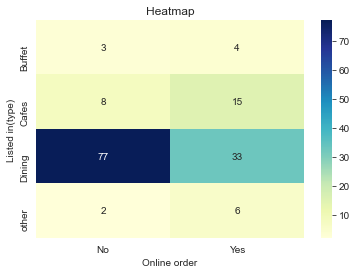

In [33]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online order")
plt.ylabel("Listed in(type)")
plt.show()

Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.